<a href="https://colab.research.google.com/github/wendirad/weekTwo/blob/task_2/notebooks/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel('data.xlsx')
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
data['Start'] = pd.to_datetime(data['Start'])
data['End'] = pd.to_datetime(data['End'])
data['Day'] = data['Start'].dt.date

In [5]:
session_frequency = data.groupby(['MSISDN/Number', 'Day']).agg(
    session_count=('Bearer Id', 'count')  # Count sessions per user per day
).reset_index()


In [6]:
session_frequency.head()

,MSISDN/Number,Day,session_count
0,3.360100e+10,2019-04-25,1
1,3.360100e+10,2019-04-27,1
2,3.360100e+10,2019-04-28,1
3,3.360101e+10,2019-04-27,1
4,3.360101e+10,2019-04-24,2


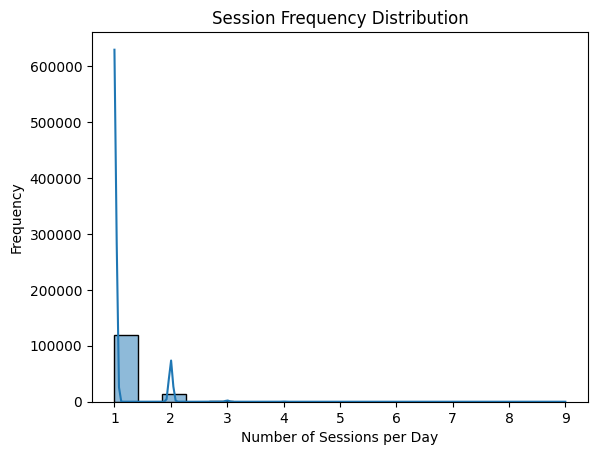

In [7]:
sns.histplot(session_frequency['session_count'], kde=True)
plt.title('Session Frequency Distribution')
plt.xlabel('Number of Sessions per Day')
plt.ylabel('Frequency')
plt.show()

In [9]:
data['Session_Duration'] = (data['End'] - data['Start']).dt.total_seconds()
data[['Bearer Id', 'Start', 'End', 'Session_Duration']].head()

,Bearer Id,Start,End,Session_Duration
0,13114483460844900352,2019-04-04 12:01:18,2019-04-25 14:35:31,1823653.0
1,13114483482878900224,2019-04-09 13:04:04,2019-04-25 08:15:48,1365104.0
2,13114483484080500736,2019-04-09 17:42:11,2019-04-25 11:58:13,1361762.0
3,13114483485442799616,2019-04-10 00:31:25,2019-04-25 07:36:35,1321510.0
4,13114483499480700928,2019-04-12 20:10:23,2019-04-25 10:40:32,1089009.0


In [11]:
user_session_duration = data.groupby('MSISDN/Number').agg(
    total_duration=('Session_Duration', 'sum'),
    average_duration=('Session_Duration', 'mean')
).reset_index()

user_session_duration.head()

,MSISDN/Number,total_duration,average_duration
0,3.360100e+10,116720.0,116720.0
1,3.360100e+10,181231.0,181231.0
2,3.360100e+10,134969.0,134969.0
3,3.360101e+10,49878.0,49878.0
4,3.360101e+10,37104.0,18552.0


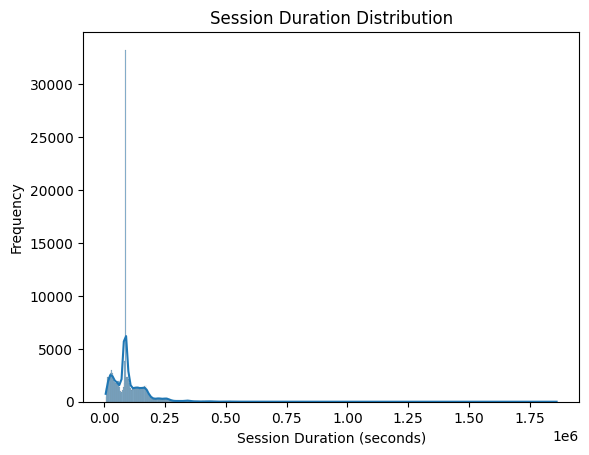

In [12]:
sns.histplot(data['Session_Duration'], kde=True)
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()